In [292]:
import pandas as pd
import numpy as np

In [293]:
df_mv=pd.read_csv('movie_metadata.csv')

In [294]:
df_mv.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [295]:
df_mv.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

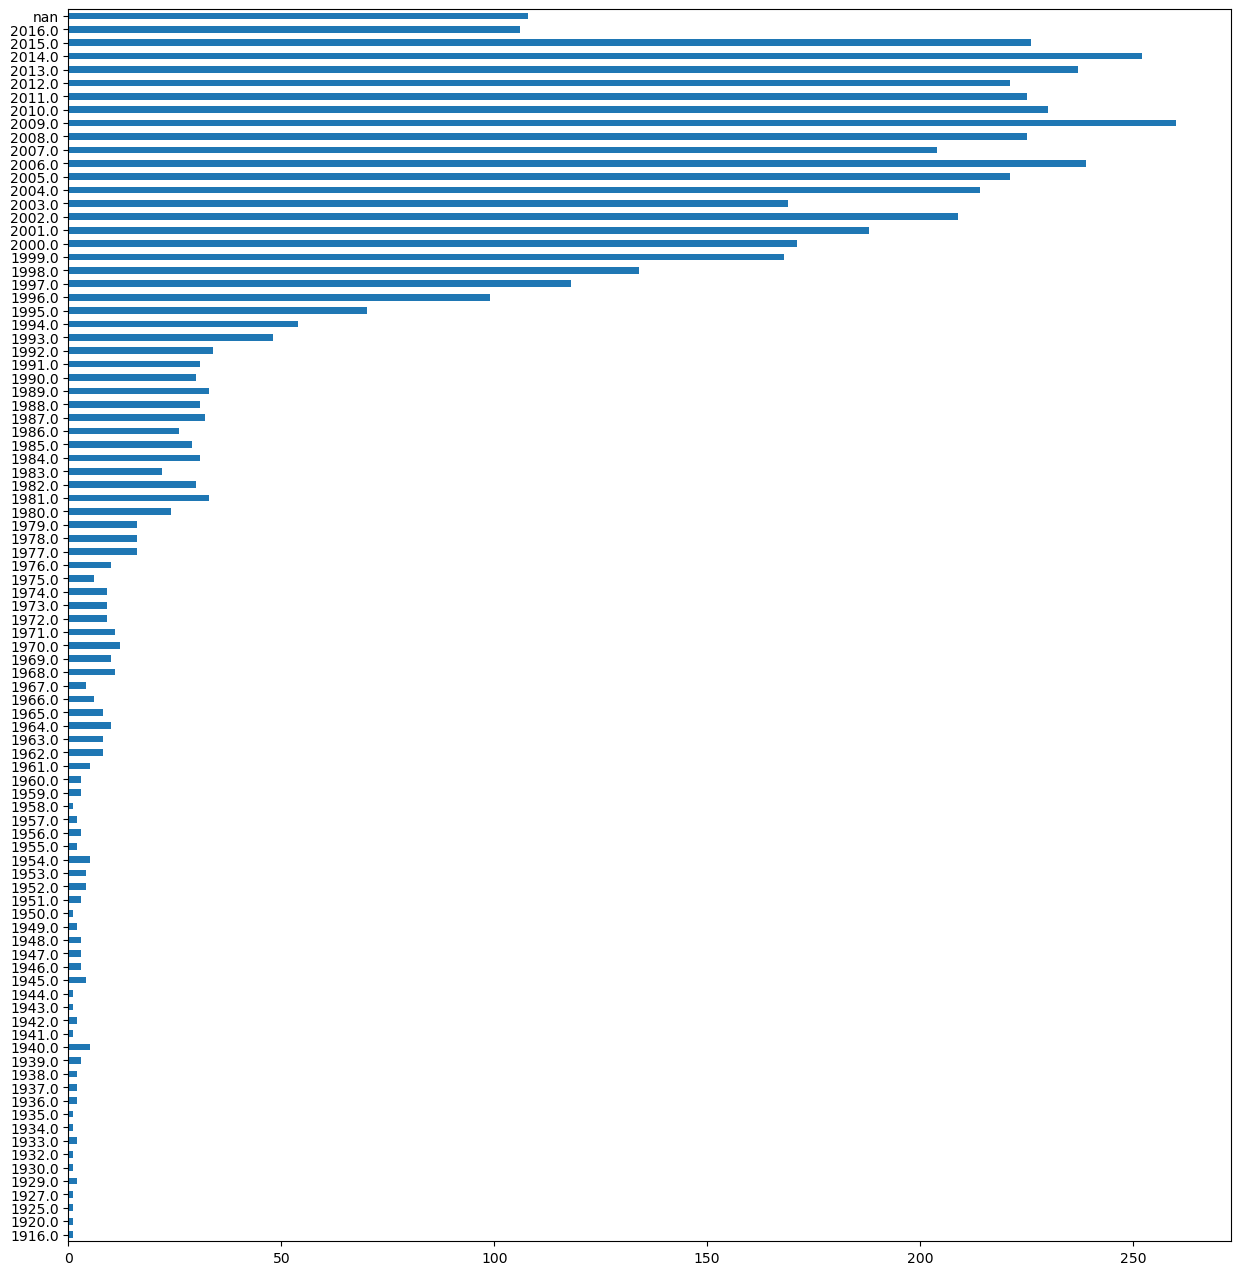

In [296]:
import matplotlib.pyplot as plt
df_mv.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [297]:
df_mv['movie_title'][:5]

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [298]:
df_mv.shape

(5043, 28)

In [299]:
df_mv.loc[df_mv['movie_title']=='Avatar\xa0',['director_name','actor_1_name','actor_2_name','actor_3_name','genres', 'movie_title']]

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar


In [300]:
df_mvnew=df_mv[['director_name','actor_1_name','actor_2_name','actor_3_name','genres', 'movie_title']]

In [301]:
df_mvnew.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [302]:
df_mvnew.isnull().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

In [303]:
#Replace nan with unknown
def replace_nan(text):
    for t in text:
        df_mvnew[t]=df_mvnew[t].replace(np.nan,'unknown')


In [304]:
replace_nan(['director_name','actor_1_name','actor_2_name','actor_3_name'])

/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_93128/3569204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvnew[t]=df_mvnew[t].replace(np.nan,'unknown')


In [305]:
df_mvnew.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

In [306]:
df_mvnew.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [307]:
#df_mvnew['genres']=df_mvnew['genres'].replace('|',' ')
df_mvnew['genres']=df_mvnew['genres'].apply(lambda x:x.replace('|',' '))
df_mvnew['genres'].head()

/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_93128/3846564183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvnew['genres']=df_mvnew['genres'].apply(lambda x:x.replace('|',' '))


0    Action Adventure Fantasy Sci-Fi
1           Action Adventure Fantasy
2          Action Adventure Thriller
3                    Action Thriller
4                        Documentary
Name: genres, dtype: object

In [308]:
#covert Movie_title to lower case
df_mvnew['movie_title']=df_mvnew['movie_title'].str.lower()

/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_93128/2976875183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvnew['movie_title']=df_mvnew['movie_title'].str.lower()


In [309]:
df_mvnew['movie_title'][0]

'avatar\xa0'

In [310]:
#Remove \xa0 from movie_title
df_mvnew['movie_title']=df_mvnew['movie_title'].apply(lambda x:x[:-1])

/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_93128/979582337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvnew['movie_title']=df_mvnew['movie_title'].apply(lambda x:x[:-1])


In [311]:
#df_mvnew.to_csv('moviedata.csv',index=False)

In [312]:
df_mvnew['movie_title'][0]

'avatar'

In [313]:
df_mvnew.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...


Load credits Dataset

In [314]:

df_credits=pd.read_csv('credits.csv')

In [315]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [316]:
df_credits.shape

(45476, 3)

Load movies_metadata dataset

In [317]:
df_meta=pd.read_csv('movies_metadata.csv')

/Users/anubhoyar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [318]:
df_meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [319]:
df_meta.shape

(45466, 24)

In [320]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [321]:
df_meta['release_date']=pd.to_datetime(df_meta['release_date'],errors='coerce')

In [322]:
df_meta['release_date'][:5]

0   1995-10-30
1   1995-12-15
2   1995-12-22
3   1995-12-22
4   1995-02-10
Name: release_date, dtype: datetime64[ns]

In [323]:
df_meta['year']=df_meta['release_date'].dt.year

In [324]:
df_meta['year'].value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

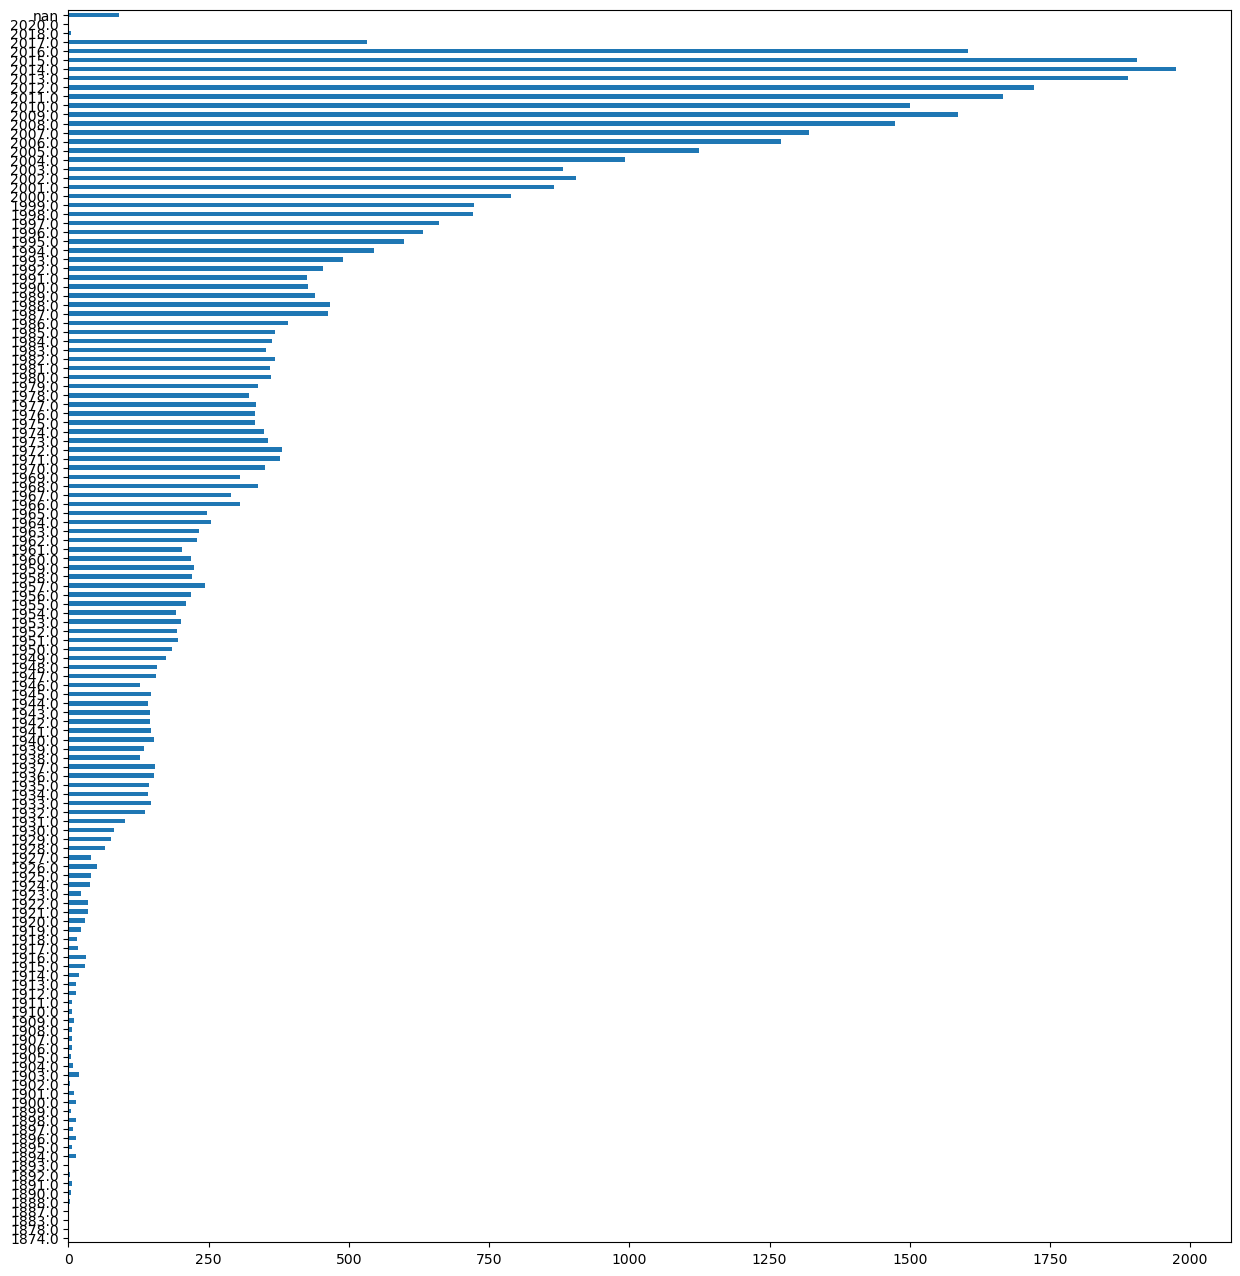

In [325]:
df_meta.year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [326]:
df_meta.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1995.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1995.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,1995.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,1995.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,1995.0


Only 2017 year is required as till 2016 is already in df_mv dataset

In [327]:
df_metanew=df_meta.loc[df_meta.year == 2017,['genres','id','title','year']]

In [328]:
df_metanew.head()

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0


In [329]:
df_metanew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 26560 to 45465
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   genres  532 non-null    object 
 1   id      532 non-null    object 
 2   title   532 non-null    object 
 3   year    532 non-null    float64
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [330]:
df_metanew['id']=df_metanew['id'].astype(int)

In [331]:
df_credmeta=pd.merge(df_metanew,df_credits,on='id')

In [332]:
df_credmeta.head()

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."


In [333]:
#to convert str to list
import ast
df_credmeta['genres'][0]

"[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy'}, {'id': 35, 'name': 'Comedy'}]"

In [334]:
ast.literal_eval("[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy'}, {'id': 35, 'name': 'Comedy'}]")

[{'id': 12, 'name': 'Adventure'},
 {'id': 28, 'name': 'Action'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 35, 'name': 'Comedy'}]

In [335]:
import ast
df_credmeta['genres'] = df_credmeta['genres'].map(lambda x: ast.literal_eval(x))
df_credmeta['cast'] = df_credmeta['cast'].map(lambda x: ast.literal_eval(x))
df_credmeta['crew'] = df_credmeta['crew'].map(lambda x: ast.literal_eval(x))

In [336]:
df_credmeta.head()

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."


In [337]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [338]:
df_credmeta['actor_1_name'] = df_credmeta['cast'].map(lambda x: get_actor1(x))

In [339]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi'
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [340]:
df_credmeta['genres_list'] = df_credmeta['genres'].map(lambda x: make_genresList(x))


In [341]:
df_credmeta['genres_list']

0      Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Sci-Fi
2      Action Adventure Fantasy Sci-Fi
3       Action Adventure Comedy Sci-Fi
4             Fantasy Action Adventure
                    ...               
526                     Romance Comedy
527         Crime Comedy Action Family
528    Family Animation Romance Comedy
529               Crime Drama Thriller
530                                NaN
Name: genres_list, Length: 531, dtype: object

In [342]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [343]:
df_credmeta['actor_1_name'] = df_credmeta['cast'].map(lambda x: get_actor1(x))

In [344]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [345]:
df_credmeta['actor_2_name'] = df_credmeta['cast'].map(lambda x: get_actor2(x))

In [346]:
df_credmeta['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [347]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [348]:
df_credmeta['actor_3_name'] = df_credmeta['cast'].map(lambda x: get_actor3(x))

In [349]:
df_credmeta['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [350]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [351]:
df_credmeta['director_name'] = df_credmeta['crew'].map(lambda x: get_directors(x))

In [352]:
df_credmeta['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [353]:
df_movie = df_credmeta.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [354]:
df_movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter


In [355]:
df_movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [356]:
df_movie = df_movie.dropna(how='any')

In [357]:
df_movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres_list      0
title            0
dtype: int64

In [358]:
df_movie = df_movie.rename(columns={'genres_list':'genres'})
df_movie = df_movie.rename(columns={'title':'movie_title'})

In [359]:
df_movie['movie_title'] = df_movie['movie_title'].str.lower()

In [360]:
df_movie['combined'] = df_movie['actor_1_name'] + ' ' + df_movie['actor_2_name'] + ' '+ df_movie['actor_3_name'] + ' '+ df_movie['director_name'] +' ' + df_movie['genres']

In [361]:
df_movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combined
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachi...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett ...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gu...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Se...


In [362]:
df_movie.shape

(458, 7)

In [363]:
df_mvnew.shape

(5043, 6)

In [364]:
df_mvnew['combined'] = df_mvnew['actor_1_name'] + ' ' + df_mvnew['actor_2_name'] + ' '+ df_mvnew['actor_3_name'] + ' '+ df_mvnew['director_name'] +' ' + df_mvnew['genres']


/var/folders/bq/5zg29r510_19d9cvc5d7t8ww0000gn/T/ipykernel_93128/74668621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvnew['combined'] = df_mvnew['actor_1_name'] + ' ' + df_mvnew['actor_2_name'] + ' '+ df_mvnew['actor_3_name'] + ' '+ df_mvnew['director_name'] +' ' + df_mvnew['genres']


In [365]:
df_mvnew.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combined
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...


In [366]:
df_new=df_mvnew.append(df_movie)

In [367]:
df_new.shape

(5501, 7)

In [369]:
#drop duplicates
df_new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)


In [370]:
df_new.shape

(5364, 7)

In [384]:
df_new.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combined
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...


In [372]:
#df_new.to_csv('new_moviedata.csv',index=False)

In [373]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [375]:
vector = cv.fit_transform(df_new['combined']).toarray()

In [376]:
vector.shape

(5364, 5000)

In [377]:
from sklearn.metrics.pairwise import cosine_similarity

In [378]:
similarity = cosine_similarity(vector)

In [379]:
similarity

array([[1.        , 0.24174689, 0.16903085, ..., 0.        , 0.07412493,
        0.        ],
       [0.24174689, 1.        , 0.19069252, ..., 0.        , 0.0836242 ,
        0.        ],
       [0.16903085, 0.19069252, 1.        , ..., 0.        , 0.0877058 ,
        0.1118034 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.16012815,
        0.        ],
       [0.07412493, 0.0836242 , 0.0877058 , ..., 0.16012815, 1.        ,
        0.09805807],
       [0.        , 0.        , 0.1118034 , ..., 0.        , 0.09805807,
        1.        ]])

In [409]:
df_new[df_new['movie_title'] == 'spectre'].index[0]

2

In [414]:
def recommend(movie):
    movie = movie.lower()
    if movie not in ['movie_title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        index = df_new[df_new['movie_title'] == movie].index[0]
        distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
        for i in distances[1:6]:
            print(df_new.iloc[i[0]].movie_title)

In [441]:
recommend('the dark knight rises')

inception
the dark knight
batman begins
sin city: a dame to kill for
premium rush
